# Problem1 

In [19]:
from __future__ import division
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y  = ml.shuffleData(X,Y)  # reorder randomly (important later)
X,_  = ml.transforms.rescale(X)   # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]   # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]   # get class 1 vs 2

## Problem 1.1

/Users/huangjiayi/Documents/003UCI/learn/2024Winter/273p_ML/hw/hw3/mltools/plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


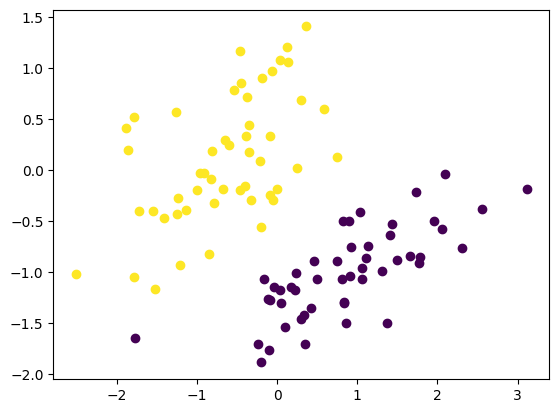

In [20]:
ml.plotClassify2D(None,XA,YA)
plt.show()

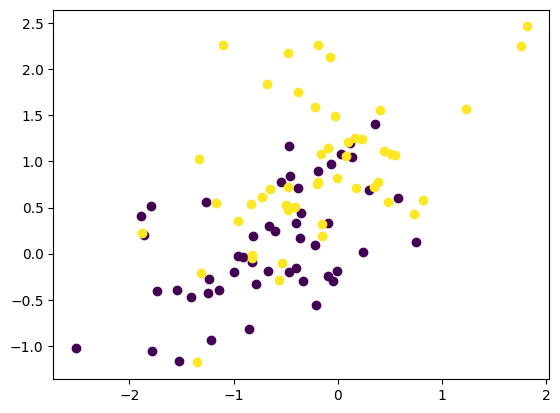

In [21]:
ml.plotClassify2D(None,XB,YB)
plt.show()

## Problem 1.2 

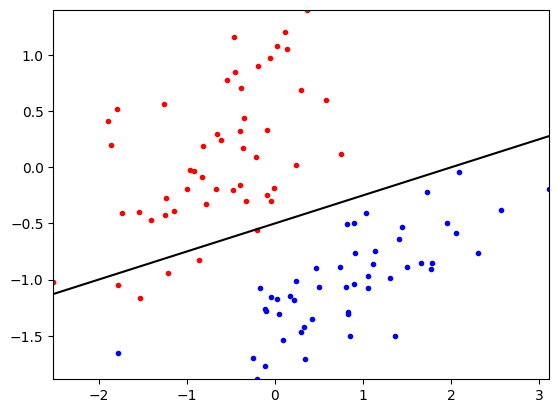

In [22]:
import mltools as ml
from logisticClassify2 import *
learnerA = logisticClassify2(); # create "blank" learner 
learnerA.classes = np.unique(YA) # define class labels using YA or YB 
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learnerA.theta = wts; # set the learner’s parameters
learnerA.plotBoundary(XA,YA)

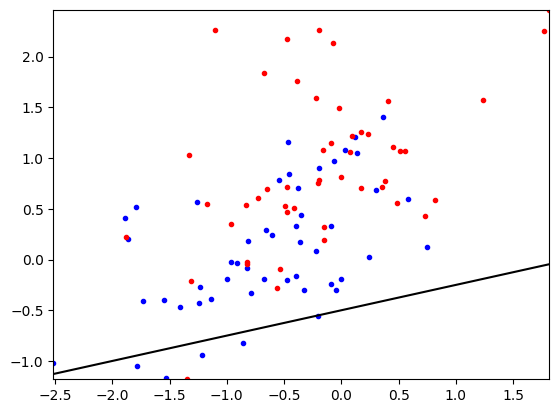

In [23]:
learnerB=logisticClassify2()
learnerB.classes=np.unique(YB)
wts=np.array([0.5,-0.25,1])
learnerB.theta=wts
learnerB.plotBoundary(XB,YB)

## Problem 1.3

In [24]:
YAhat=learnerA.predict(XA)
YBhat=learnerA.predict(XB)
print('Error Data set A: ',learnerA.err(XA,YA))
print('Error Data set B: ',learnerA.err(XB,YB))

Error Data set A:  0.050505050505050504
Error Data set B:  0.5454545454545454


## Problem 1.4 

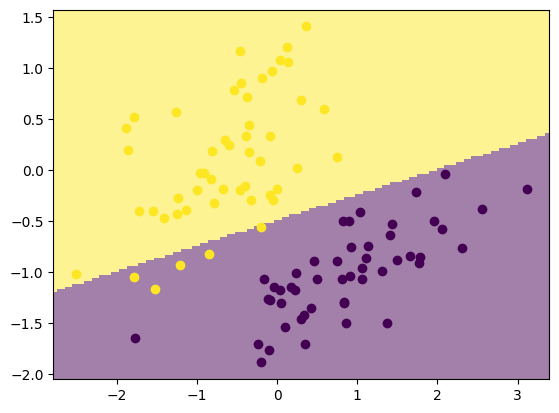

In [25]:
ml.plotClassify2D(learnerA,XA,YA)

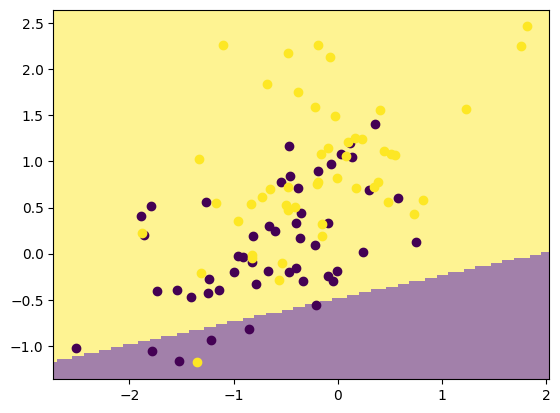

In [26]:
ml.plotClassify2D(learnerB,XB,YB)

## Problem 1.5 
$$\frac{\partial J_{j}}{\partial \theta_{0}}={x_{0}}(\sigma-y^{(j)})$$  
$$\frac{\partial J_{j}}{\partial \theta_{1}}={x_{1}}(\sigma-y^{(j)})$$  
$$\frac{\partial J_{j}}{\partial \theta_{2}}={x_{2}}(\sigma-y^{(j)})$$  

## Problem 1.6/1.7

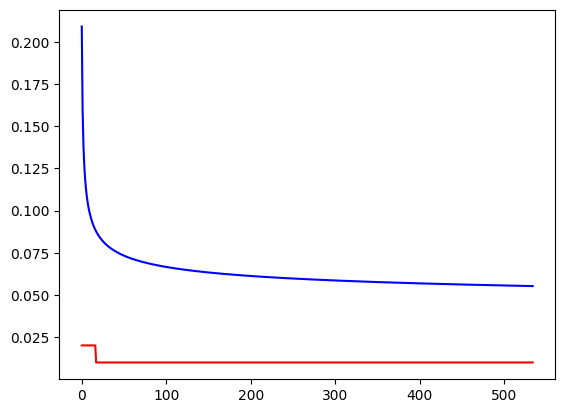

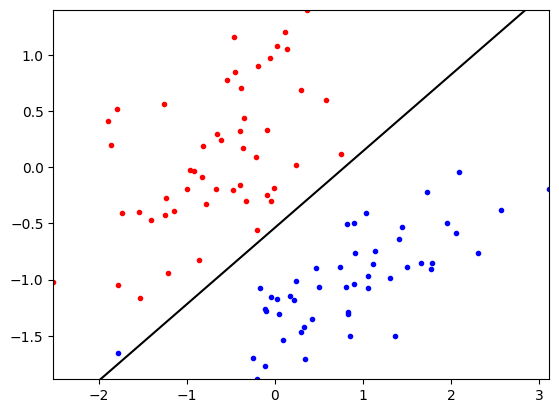

Training error rate:  0.010101010101010102


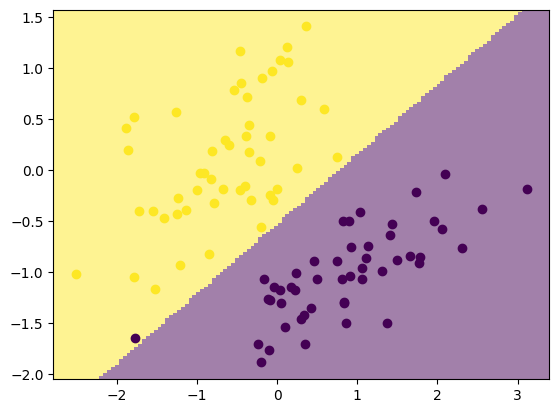

In [27]:
learnerA.theta = np.array([0.,0.,0.])
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5)
plt.show()
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))

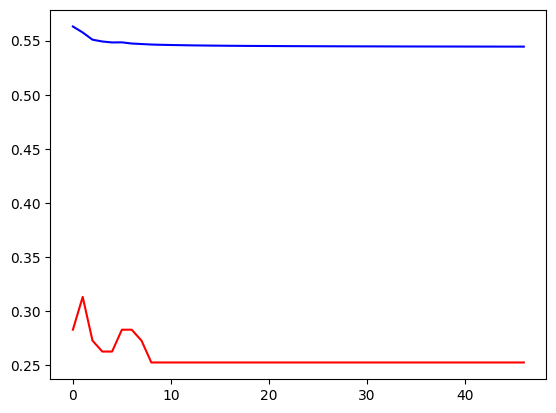

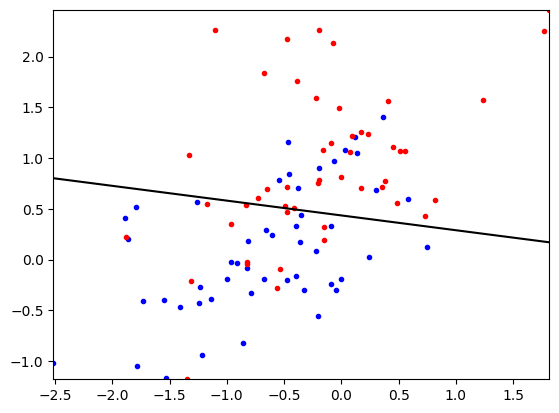

Training error rate:  0.25252525252525254


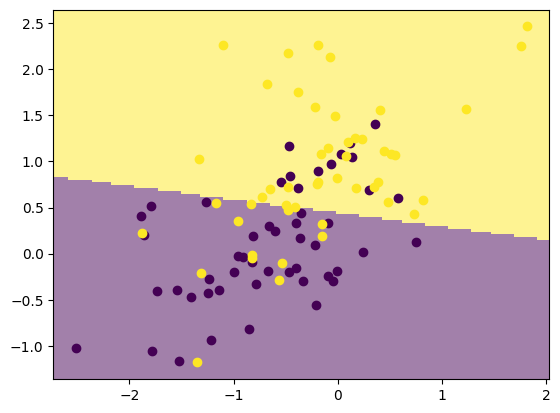

In [28]:
learnerB.theta = np.array([0.,0.,0.])
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5)
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate: ",learnerB.err(XB,YB))

## Problem 1.8 

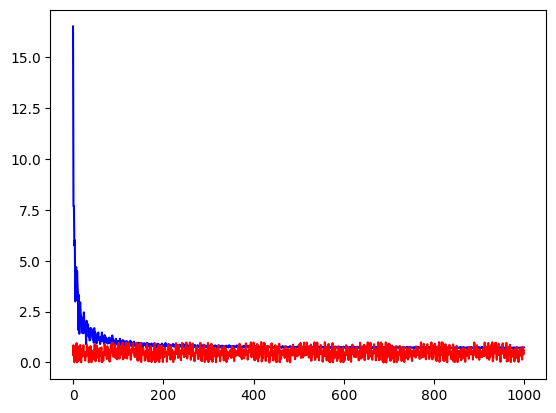

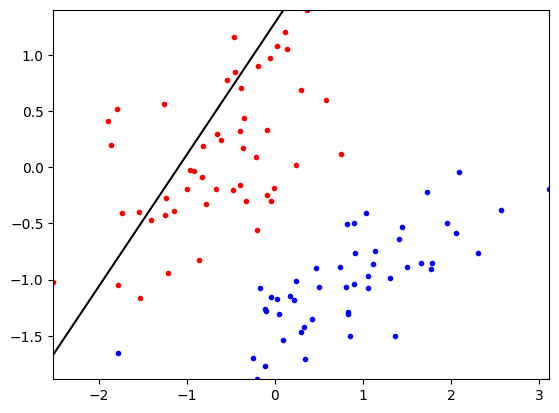

Training error rate:  0.5959595959595959


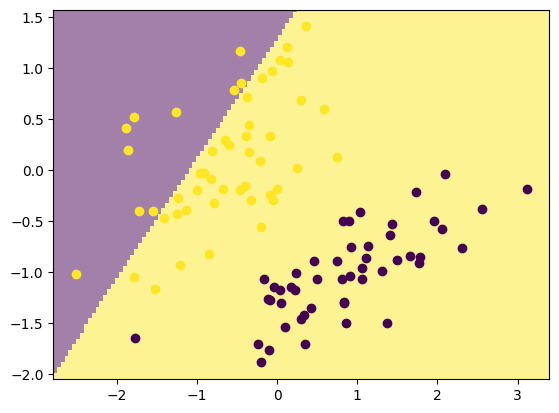

In [29]:
L1_alpha = 10
learnerAL1 = logisticClassify2(); 
learnerAL1.theta = np.array([0.,0.,0.])
learnerAL1.regTrainL1(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=L1_alpha)
plt.show()
ml.plotClassify2D(learnerAL1,XA,YA)
print("Training error rate: ",learnerAL1.err(XA,YA))

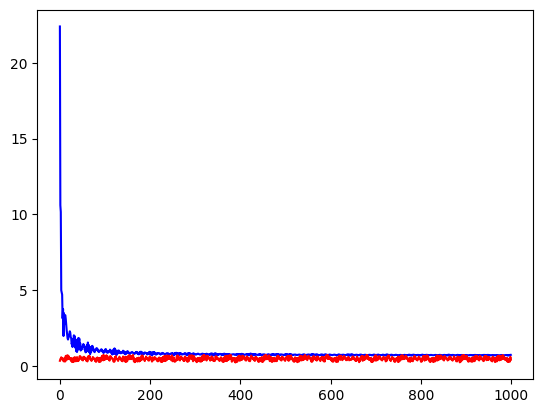

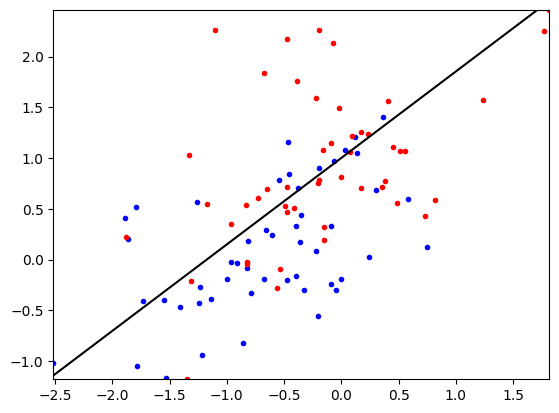

Training error rate:  0.42424242424242425


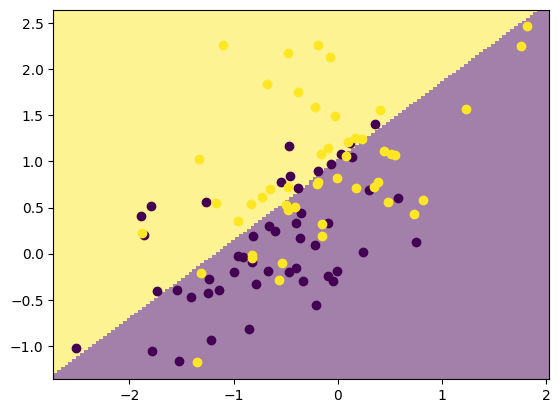

In [30]:
learnerBL1 = logisticClassify2(); 
learnerBL1.theta = np.array([0.,0.,0.])
learnerBL1.regTrainL1(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=L1_alpha)
plt.show()
ml.plotClassify2D(learnerBL1,XB,YB)
print("Training error rate: ",learnerBL1.err(XB,YB))

In [31]:
print(learnerA.theta,learnerAL1.theta)
print(learnerA.err(XA,YA),learnerAL1.err(XA,YA))

[ 2.17599611 -2.75794635  4.04441023] [ 0.00158393  0.0014462  -0.001231  ]
0.010101010101010102 0.5959595959595959


The value of theta have dropped and error has increased due to L1 regularization term.

## Problem 1.9 

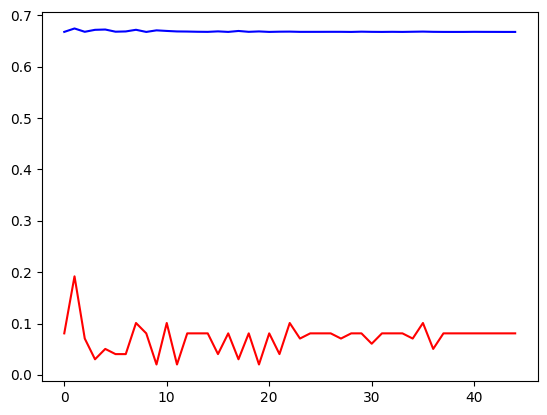

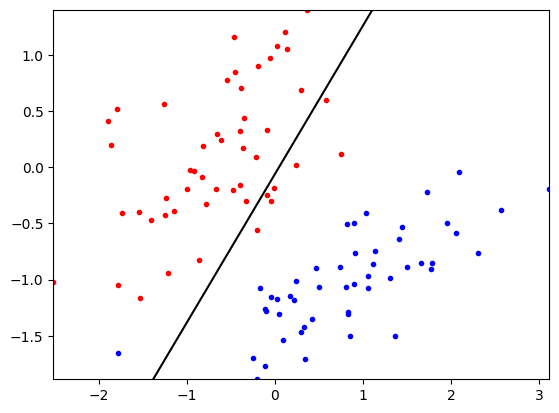

Training error rate:  0.08080808080808081


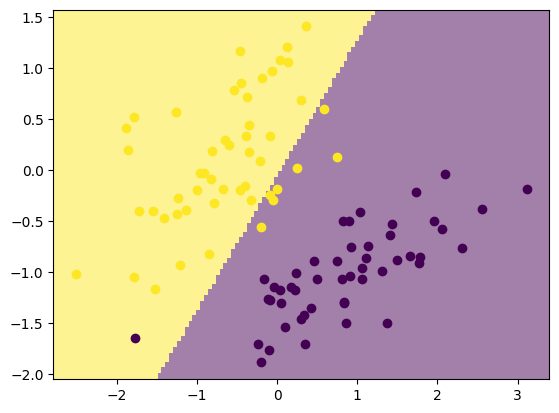

In [32]:
L2_alpha = 2
learnerAL2 = logisticClassify2(); 
learnerAL2.theta = np.array([0.,0.,0.])
learnerAL2.regTrainL2(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=L2_alpha)
plt.show()
ml.plotClassify2D(learnerAL2,XA,YA)
print("Training error rate: ",learnerAL2.err(XA,YA))

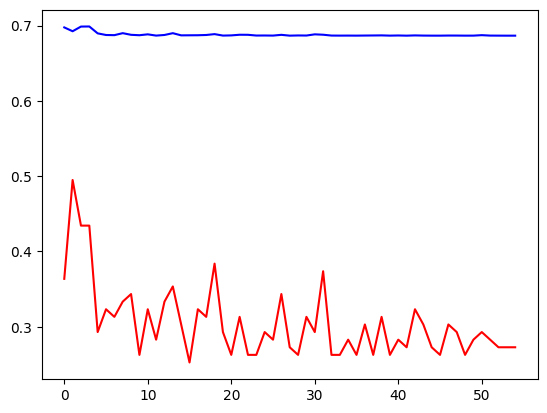

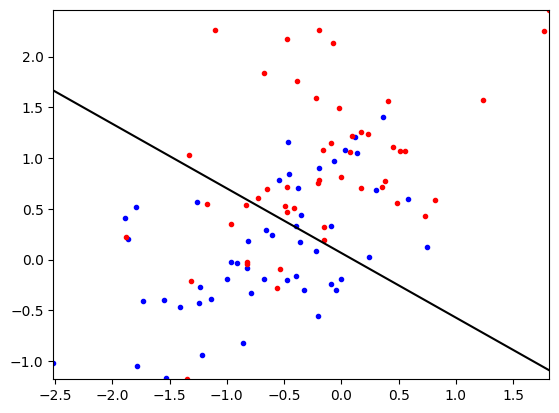

Training error rate:  0.2727272727272727


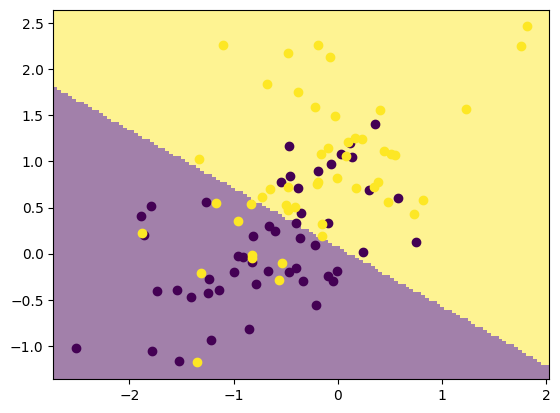

In [33]:
learnerBL2 = logisticClassify2(); 
learnerBL2.theta = np.array([0.,0.,0.])
learnerBL2.regTrainL2(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5,alpha=L2_alpha)
plt.show()
ml.plotClassify2D(learnerBL2,XB,YB)
print("Training error rate: ",learnerBL2.err(XB,YB))

In [34]:
print(learnerAL1.theta,learnerAL2.theta)
print(learnerAL1.err(XA,YA),learnerAL2.err(XA,YA))

[ 0.00158393  0.0014462  -0.001231  ] [ 0.00388709 -0.08433112  0.06375112]
0.5959595959595959 0.08080808080808081


Compared with L1 regularization, the value of theta have dropped, and the error has decresedd due to L2 regularization term.

## Problem 1.10

For L1 regularization, the loss fuction +α||θ|| , and the gradient +αsign(θ).  
For L2 regularization, the loss fuction +α||θ||^2 , and the gradient +2αθ.  
L2 regularization is the better one.

# Statement of Collaboration  
I do it by myself